### ***NOMALIZATION

<span style='color:blue'>NOMALIZATION LÀ PHƯƠNG PHÁP THAY ĐỔI HÌNH DẠNG PHÂN PHỐI CỦA DỮ LIỆU

### STANDARDIZATION

<span style='color:blue'>STANDARDIZATION LÀ PHƯƠNG PHÁP THAY ĐỔI HÌNH DẠNG PHÂN PHỐI CỦA DỮ LIỆU, ĐƯA DỮ LIỆU VỀ 1 PHÂN PHỐI CHUẨN KÌ VỌNG, ĐƯA CÁC BIẾN VỀ CÙNG 1 THANG ĐO, GIÚP GIẢM ẢNH HƯỞNG CỦA ĐƠN VỊ ĐO VÀ ĐẢM BẢO CÁC BIẾN CÓ GIÁ TRỊ TRUNG BÌNH LÀ 0 VÀ PHƯƠNG SAI LÀ 1

### *PHÂN PHỐI CHUẨN


<img src='https://th.bing.com/th/id/R.e7a042db29b39bb94416c06789301faa?rik=kqVGCjlwV%2fxUXw&riu=http%3a%2f%2fimages.flatworldknowledge.com%2fshafer%2fshafer-fig05_011.jpg&ehk=SVDBle7iNthW1b1SS1BYhUnIA6cbXE9lu5eY4%2bK3v90%3d&risl=&pid=ImgRaw&r=0' style="width:500px;"/>

### *CÔNG THỨC


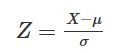

### BÀI TOÁN : CHUẨN HÓA BỘ DỮ LIỆU SAU ĐÂY [1,500,1000,0.6,0.01,10,5,5,4,8,1000,10000,12200,25000]

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<span style='color:blue'>PHÂN TÍCH

<Axes: >

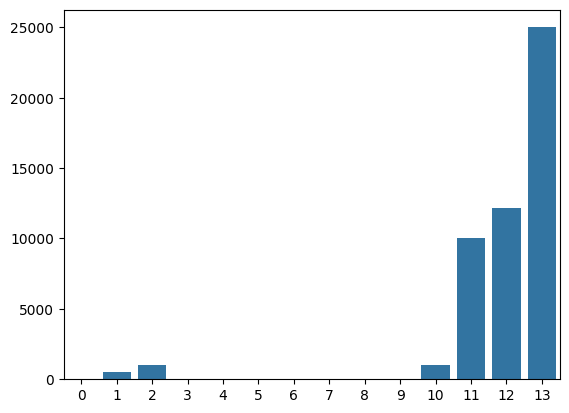

In [147]:
arr=np.array([1,500,1000,0.6,0.01,10,5,5,4,8,1000,10000,12200,25000])
sns.barplot(data=arr)


<span style='color:blue'>TÍNH GIÁ TRỊ TRUNG BÌNH

In [148]:
mean=np.mean(arr)
mean

3552.4007142857145

In [149]:
variance=sum([(x-mean)**2 for x in arr])/arr.shape[0]
standard_devia=np.sqrt(variance)
standard_devia

7068.12017680238

<span style='color:blue'>CHUẨN HÓA DỮ LIỆU

In [150]:
standard_arr=(arr-mean)/standard_devia
standard_arr

array([-0.50245336, -0.43185467, -0.3611145 , -0.50250995, -0.50259342,
       -0.50118003, -0.50188744, -0.50188744, -0.50202892, -0.501463  ,
       -0.3611145 ,  0.9122085 ,  1.22346523,  3.0344135 ])

<Axes: >

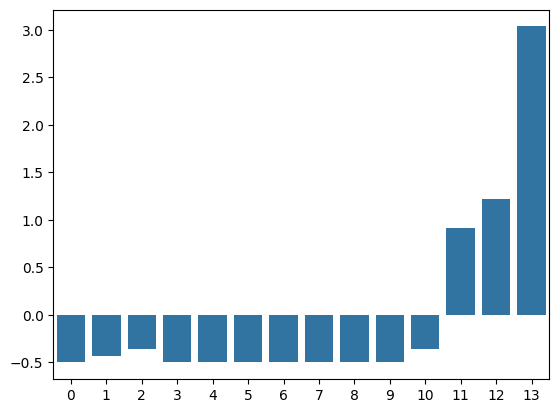

In [151]:
sns.barplot(data=standard_arr)

### LOG TRANSFORM

<Axes: >

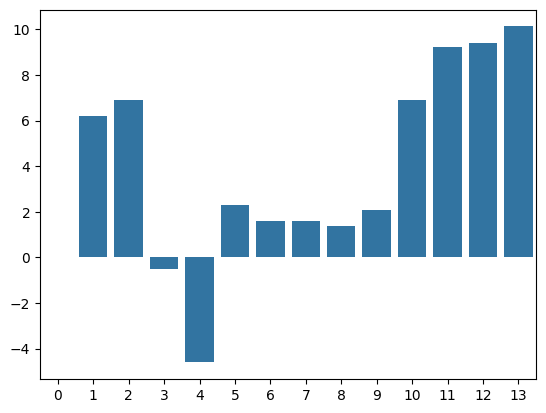

In [152]:
log_arr=np.log(arr)
sns.barplot(log_arr)

### ***SCALING

### MIN-MAX SCALING

### CÔNG THỨC

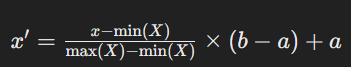

### BÀI TOÁN : SCALE BỘ DỮ LIỆU SAU ĐÂY [1,500,1000,0.6,0.01,10,5,5,4,8,1000,10000,12200,25000] VỀ KHOẢNG (0,3)

In [153]:
standarded=(arr-min(arr))/(max(arr)-min(arr))*(3-0)+0

In [154]:
standarded

array([1.18800048e-04, 5.99988240e-02, 1.19998848e-01, 7.08000283e-05,
       0.00000000e+00, 1.19880048e-03, 5.98800240e-04, 5.98800240e-04,
       4.78800192e-04, 9.58800384e-04, 1.19998848e-01, 1.19999928e+00,
       1.46399939e+00, 3.00000000e+00])

<Axes: >

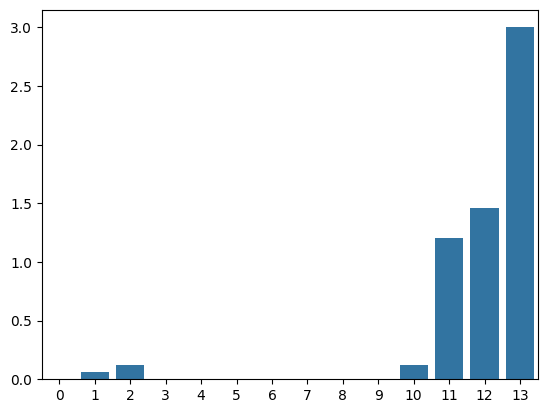

In [155]:
sns.barplot(standarded)

### MIN-MAX SCALING [0,1]

### BÀI TOÁN : SCALE BỘ DỮ LIỆU SAU ĐÂY [1,500,1000,0.6,0.01,10,5,5,4,8,1000,10000,12200,25000] VỀ ĐOẠN [0,1]

### *CÔNG THỨC

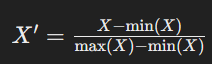

In [156]:
arr=np.array([1,500,1000,0.6,-500,-1200,5,5,4,8,1000,10000,12200,25000])


[0.04583969 0.0648855  0.08396947 0.04582443 0.02671756 0.
 0.04599237 0.04599237 0.0459542  0.04610687 0.08396947 0.42748092
 0.51145038 1.        ]


<Axes: >

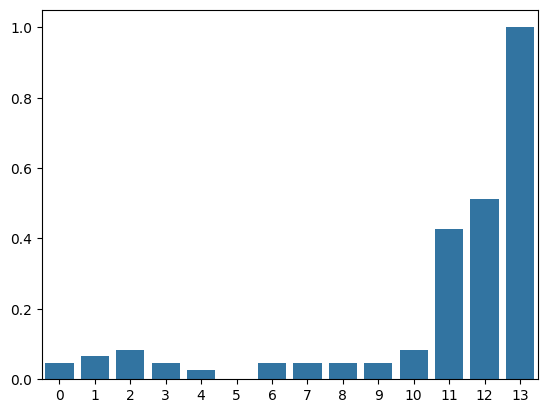

In [157]:
standarded=(arr-min(arr))/(max(arr)-min(arr))
print(standarded)
sns.barplot(data=standarded)

### ROBUST

### *CÔNG THỨC

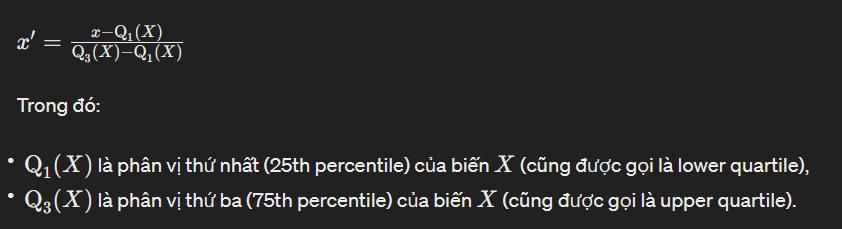

### BÀI TOÁN : CHUẨN HÓA BỘ DỮ LIỆU SAU ĐÂY [1,500,1000,0.6,-500,-1200,5,5,4,8,1000,10000,12200,25000]

In [158]:
def find_q(a):
    n=len(a)
    if n%2==1:
        q2=int((n+1)/2)-1
        return a[q2]
    else:
        q2_l=int(n/2)
        q2_r=q2_l+1
        return (q2_l+q2_r)/2
            

In [159]:
arr=[1,500,1000,0.6,-500,-1200,5,5,4,8,1000,10000,12200,25000]
arr.sort()
q2=find_q(arr)
print(q2)

7.5


In [160]:
left_arr=[]
right_arr=[]
for value in arr:
    if value<=q2:
        left_arr.append(value)
    elif value>=q2:
        right_arr.append(value)
print("MẢNG TRÁI : {}".format(left_arr))
q1=find_q(left_arr)
print("Q1 : {}".format(q1))
print("MẢNG PHẢI : {}".format(right_arr))
q3=find_q(right_arr)
print("Q3 : {}".format(q3))

MẢNG TRÁI : [-1200, -500, 0.6, 1, 4, 5, 5]
Q1 : 1
MẢNG PHẢI : [8, 500, 1000, 1000, 10000, 12200, 25000]
Q3 : 1000


### *CHUẨN HÓA

In [161]:
arr=np.array(arr)
arr=(arr-q1)/(q3-q1)
arr

array([-1.20220220e+00, -5.01501502e-01, -4.00400400e-04,  0.00000000e+00,
        3.00300300e-03,  4.00400400e-03,  4.00400400e-03,  7.00700701e-03,
        4.99499499e-01,  1.00000000e+00,  1.00000000e+00,  1.00090090e+01,
        1.22112112e+01,  2.50240240e+01])

<Axes: >

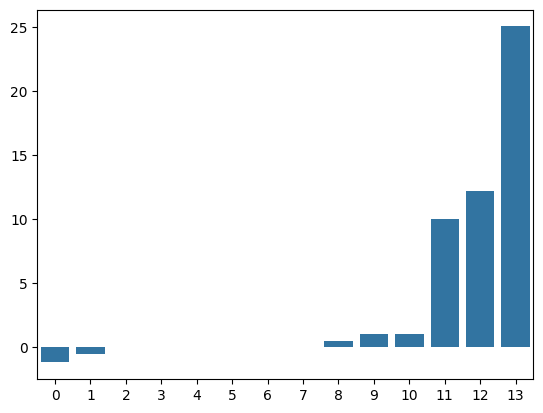

In [162]:
sns.barplot(data=arr)

### ***APPLY SCALING AND NORMALIZATION FOR DATASET [1,500,1000,0.6,0.01,10,5,5,4,8,1000,10000,12200,25000]

<Axes: >

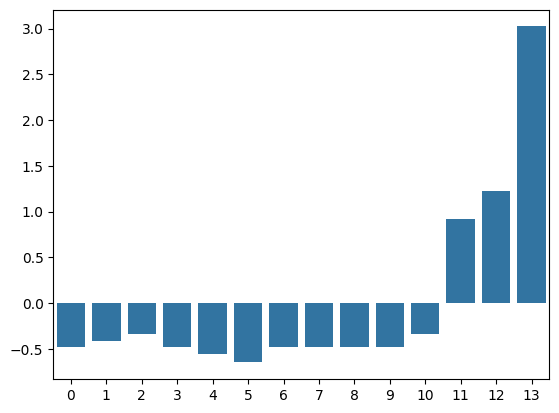

In [167]:
standarded
mean=np.mean(standarded)
variance=sum([(x-mean)**2 for x in standarded])/standarded.shape[0]
standard_devia=np.sqrt(variance)
standard_devia
norm_arr=(standarded-mean)/standard_devia
norm_arr
sns.barplot(norm_arr)